##### Handling duplicate data

In [93]:
#duplicate data means whole row should get repeated

In [94]:
import pandas as pd

In [95]:
data = {"name":["a","b","c","d","a","c"],"eng":[8,5,6,4,8,3],"maths":[2,4,6,8,2,3]}

In [96]:
df = pd.DataFrame(data)
df

,name,eng,maths
0,a,8,2
1,b,5,4
2,c,6,6
3,d,4,8
4,a,8,2
5,c,3,3


In [97]:
#df["duplicates"] = df.duplicated()

In [98]:
# df

# name	eng	maths	duplicates
# 0	a	8	2	False
# 1	b	5	4	False
# 2	c	6	6	False
# 3	d	4	8	False
# 4	a	8	2	True
# 5	c	3	3	False

In [99]:
df.drop_duplicates(keep="first",inplace=True)
#here keep was optional as we only have one duplicate data

In [100]:
df

,name,eng,maths
0,a,8,2
1,b,5,4
2,c,6,6
3,d,4,8
5,c,3,3


##### Replace and change data types

In [101]:
dataset = pd.read_csv("food_coded.csv")
dataset.head(3)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [103]:
dataset["weight"].isnull().sum()

2

In [104]:
dataset["weight"].value_counts()

weight
135                         8
140                         8
150                         7
170                         7
175                         6
180                         6
155                         6
185                         6
165                         5
190                         5
125                         5
145                         4
200                         4
130                         4
120                         3
160                         3
129                         2
113                         2
128                         2
167                         2
210                         2
118                         1
192                         1
187                         1
112                         1
144 lbs                     1
127                         1
260                         1
184                         1
230                         1
138                         1
265                         1
205                         1
169

In [105]:
dataset["weight"].fillna(dataset["weight"].mode()[0],inplace=True)

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_13436\1164658386.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["weight"].fillna(dataset["weight"].mode()[0],inplace=True)


In [106]:
dataset["weight"].isnull().sum()

0

In [107]:
dataset["weight"].replace("I'm not answering this.","1",inplace=True)
#don't know why data is not replaced

In [108]:
#converting data type
#dataset["weight"]=dataset["weight"].astype("int64")
#This is also not working

##### Function Transformer

In [109]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
from sklearn.preprocessing import FunctionTransformer

In [111]:
ft = FunctionTransformer(func=np.log1p)


In [112]:
ft.fit(dataset[["waffle_calories"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [113]:
dataset["waffle_calories_ft"] = ft.transform(dataset[["waffle_calories"]])

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_13436\3008923296.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["waffle_calories"])
C:\Users\Riddhi\AppData\Local\Temp\ipykernel_13436\3008923296.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["waffle_calories_ft"])


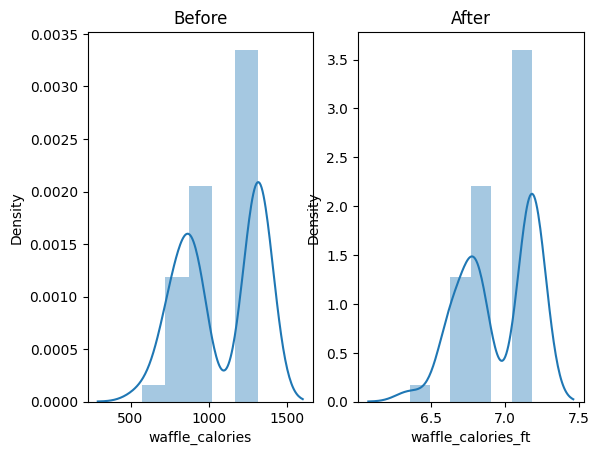

In [115]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["waffle_calories"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["waffle_calories_ft"])

plt.show()

In [117]:
ft1 = FunctionTransformer(func=lambda x:x**2)
ft1.fit(dataset[["waffle_calories"]])
dataset["waffle_calories_ft1"] = ft1.transform(dataset[["waffle_calories"]])

C:\Users\Riddhi\AppData\Local\Temp\ipykernel_13436\1044573658.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["waffle_calories"])
C:\Users\Riddhi\AppData\Local\Temp\ipykernel_13436\1044573658.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["waffle_calories_ft1"])


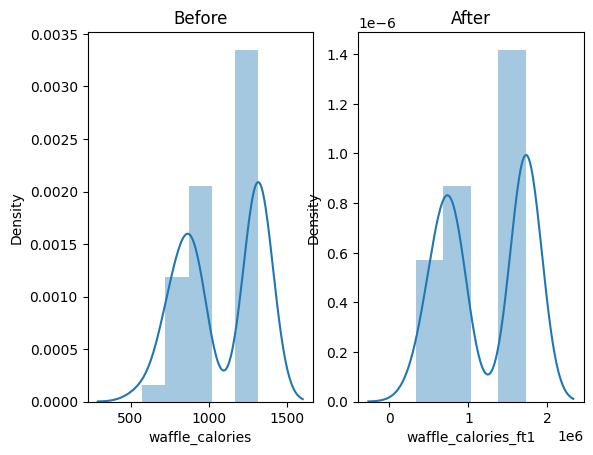

In [118]:
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(dataset["waffle_calories"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(dataset["waffle_calories_ft1"])

plt.show()